<a href="https://colab.research.google.com/github/Shir-Nitzan/PracticalProbabilityModelsforComputerScienceSeminar/blob/main/WorldCup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Cup Prediction
##Who Gonna Take The Holy Grail?


---

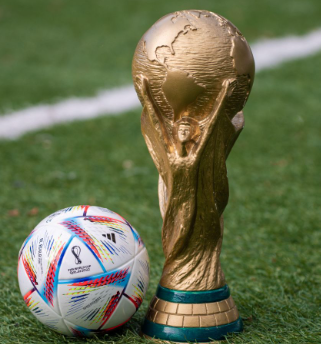

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [ ]:
from utils import set_pyplot_params
set_pyplot_params()

In [ ]:
import numpy as np
from numpy import random as rnd
import string
import pandas as pd
from scipy.stats import poisson
from empiricaldist import Pmf, Cdf
from utils import decorate

In [ ]:
df_historical_data = pd.read_csv('https://raw.githubusercontent.com/ifrankandrade/fifa-world-cup-2022-prediction/main/data/clean_fifa_worldcup_matches.csv')
df_fixture = pd.read_csv('https://raw.githubusercontent.com/ifrankandrade/fifa-world-cup-2022-prediction/main/data/clean_fifa_worldcup_fixture.csv')

In [ ]:
df_fixture = df_fixture.rename(columns={'home':'Team 1', 'away': 'Team 2', 'score': 'Match'}).drop(columns='year')
df_fixture = df_fixture[['Team 1', 'Team 2', 'Match' ]]

##Meet the teams in the world cup.

In [ ]:
teams_worldcup = [
    'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal', 'Australia',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Qatar'
]

In [ ]:
df_home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']]
df_away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']]

df_home = df_home.rename(columns={'HomeTeam':'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals': 'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam':'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals': 'GoalsScored'})

df_home = df_home[df_home['Team'].isin(teams_worldcup)]
df_away = df_away[df_away['Team'].isin(teams_worldcup)]

df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()

df_team_strength

,GoalsScored,GoalsConceded
Team,,
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Belgium,1.416667,1.500000
Brazil,2.100917,0.963303
Cameroon,0.782609,1.869565
Canada,0.000000,1.666667
Costa Rica,1.055556,1.555556
Croatia,1.521739,1.130435
Denmark,1.500000,1.300000


In [ ]:
def get_goals_conceded(team):
  return df_team_strength.at[team,'GoalsConceded']

In [ ]:
def get_goals_scored(team):
  return df_team_strength.at[team,'GoalsScored']

In [ ]:
df_team_strength.GoalsScored.max()

2.1009174311926606

**The Poisson Distribution**

If the number of goals scored in a game follows a Poisson distribution with a goal-scoring rate, the probability of scoring k goals is  $\frac {{\lambda}^{k}exp(-{\lambda})} {k!}$.




In [ ]:
def make_poisson_pmf(lam, qs):
    """Make a Pmf of a Poisson distribution."""
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    return pmf

In [ ]:
def get_poisson_dist(team, color='g', goals_conceded=False):
  lam = get_goals_conceded(team) if goals_conceded else get_goals_scored(team)
  goals = np.arange(10)
  pmf_goals = make_poisson_pmf(lam, goals)
  pmf_goals.bar(label=f'Poisson distribution with $\lambda$ = {round(lam, 3)}', color=color)
  title = f'Distribution of goals scored by {team}'
  decorate(xlabel='Number of goals', ylabel='PMF', title=title)

For example, let's look about Belgium goal scoring rate and compute the probability of scoring 3 goals in a game.

In [ ]:
Belgium_avg_goals = get_goals_scored('Belgium')
Belgium_avg_goals

1.4166666666666667

In [ ]:
make_poisson_pmf(Belgium_avg_goals, [3]) * 100

,probs
3,11.492149




This result implies that if the average goal-scoring rate is 1.416 goals per game, the probability of scoring 3 goals in a game is about 11.5%.

We will use the following function to make a Pmf that represents a Poisson distribution.


here’s the distribution of goals scored for lam=1.416, computed for values of k from 0 to 9.

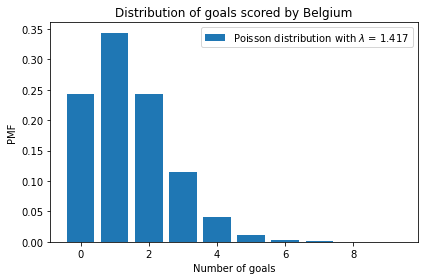

In [ ]:
get_poisson_dist('Belgium', color='C0')

let's visualized more teams distributions

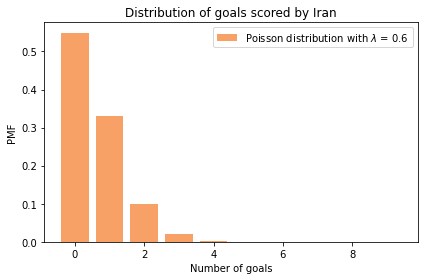

In [ ]:
get_poisson_dist('Iran', color='C1')

####The best attacking team

In [ ]:
max = df_team_strength.GoalsScored.max()
df_team_strength[df_team_strength.GoalsScored == max]

,GoalsScored,GoalsConceded
Team,,
Brazil,2.100917,0.963303


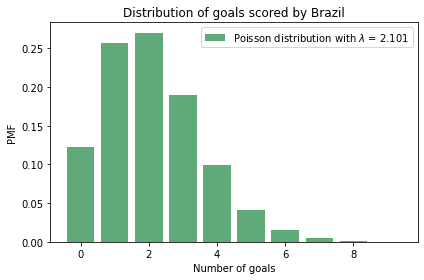

In [ ]:
get_poisson_dist('Brazil', color='C2')

####The best defensive team

In [ ]:
min = df_team_strength.GoalsConceded.min()
df_team_strength[df_team_strength.GoalsConceded == min]

,GoalsScored,GoalsConceded
Team,,
Wales,0.8,0.8


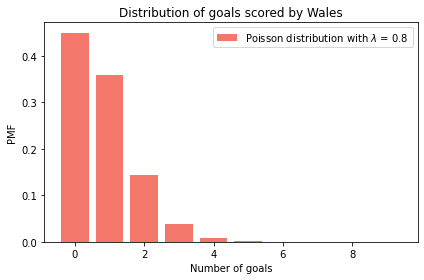

In [ ]:
get_poisson_dist('Wales', color='C3', goals_conceded=False)

**The Exponential Distribution**

We will check what is the probability of seeing a specific interval between goals.

In [ ]:
def expo_pdf(t, lam):
    """Compute the PDF of the exponential distribution."""
    return lam * np.exp(-lam * t)

In [ ]:
def expo_cdf(t, lam):
    """Compute the CDF of the exponential distribution."""
    return 1 - np.exp(-lam * t)

In [ ]:
def decorate_time_between_goals(title='', ylabel='PDF', minutes_scop=False):
    scop = 'minutes' if minutes_scop else 'games'
    decorate(xlabel=f'Time between goals ({scop})',
             ylabel=ylabel,
             title=title)

In [ ]:
def get_exp_dist(team, fun_label='PMF', minutes_scop=False):
      lam = get_goals_scored(team)
      lam = lam / 90 if minutes_scop else lam 

      stop = 270 if minutes_scop else 4
      num_of_intervals = 500 if minutes_scop else 101
      qs = np.linspace(0, stop, num_of_intervals)
      
      if fun_label == 'PDF':
        ps = expo_pdf(qs, lam)
        pmf_time = Pmf(ps, qs)
        pmf_time.plot(label=f'{team} with $\lambda$ = {round(lam, 3)}', color='r')
      else:
        ds = expo_cdf(qs, lam)
        cdf_time = Cdf(ds, qs)
        cdf_time.plot(label=f'{team} with $\lambda$ = {round(lam, 3)}')

      title = f'Distribution of time between goals'
      decorate_time_between_goals(title, ylabel=fun_label, minutes_scop=minutes_scop)

Let's see what is the probablity that that brazil will score in the first half of the game using the cdf (Probably miss the first half ☹)

In [ ]:
Brazil_avg_goals = get_goals_scored('Brazil')
Brazil_lam = Brazil_avg_goals / 90
Brazil_lam

0.023343527013251784

So Brazil has rate of ${\lambda}$ = 0.023 per minute. So: <br>
$F(45) = P(X<=45)= 1 - {e}^{45\lambda} $

In [ ]:
expo_cdf(45, Brazil_lam) * 100

65.02227359807853

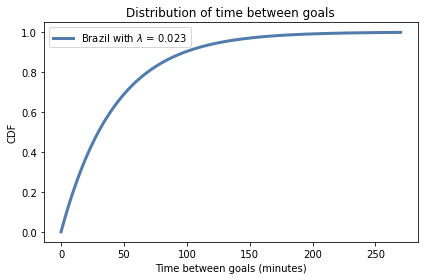

In [ ]:
get_exp_dist('Brazil', fun_label='CDF', minutes_scop=True)

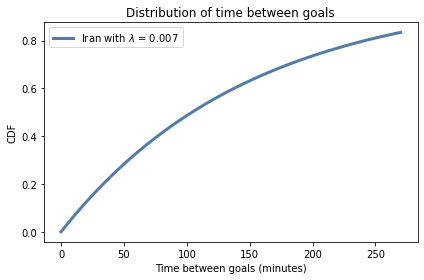

In [ ]:
get_exp_dist('Iran', fun_label='CDF', minutes_scop=True)

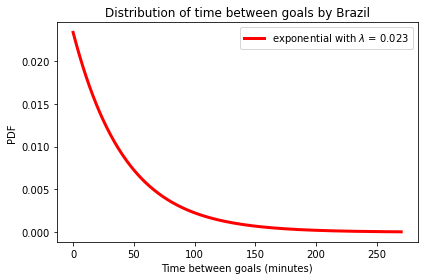

In [ ]:
get_exp_dist('Brazil', fun_label='PDF', minutes_scop=True)

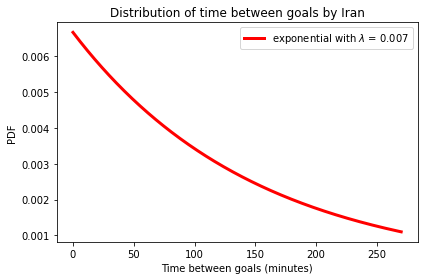

In [ ]:
get_exp_dist('Iran', fun_label='PDF', minutes_scop=True)

[None, None, None, None]

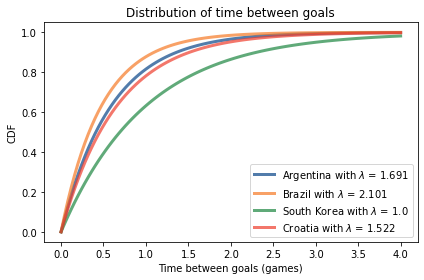

In [ ]:
teams = ['Argentina', 'Brazil', 'South Korea', 'Croatia']
[get_exp_dist(t, fun_label='CDF', minutes_scop=False) for t in teams]

##How are we going to predict the matches?

We could build a fancy machine learning model and feed it multiple variables, but since we have to use Poisson, we decided to give a chance to the Poisson distribution.

<br>

##So how can the **Poisson distribution** can help us? 
The Poisson distribution is a discrete probability distribution that describes the number of events (goals) occurring in a fixed time interval
<br>

### We need to meet the the assumptions of the Poisson distribution:

1.   The number of events can be counted
2.   The occurrence of events is independent
3.   The rate at which events occur is constant - Memoryless
4.   Two events cannot occur at exactly the same instant in time

We know that 1, 4 are always true. <br>
Assumption 2 not always true - for example psychological issues after goal been scored.<br>
Assumption 3 not always true - for example the player are tired in the end of the game.<br>
But let’s assume that assumptions 2 and 3 are always true.


In [ ]:
match_titles = lambda title, num_of_games : [f'{title} {i}' for i in range(1, 1 + num_of_games)]

df_fixture_knockout = df_fixture[48:56].copy()
df_fixture_knockout['Round'] = match_titles('Knockout', 8)

df_fixture_quarter = df_fixture[56:60].copy()
df_fixture_quarter['Round'] = match_titles('Quarter Final', 4)

df_fixture_semi = df_fixture[60:62].copy()
df_fixture_semi['Round'] = match_titles('Semi Final', 2)

df_fixture_final = df_fixture[63:].copy()
df_fixture_final['Round'] = ['Final']

df_fixture_knockout

,Team 1,Team 2,Match,Round
48,Winners Group A,Runners-up Group B,Match 49,Knockout 1
49,Winners Group C,Runners-up Group D,Match 50,Knockout 2
50,Winners Group D,Runners-up Group C,Match 52,Knockout 3
51,Winners Group B,Runners-up Group A,Match 51,Knockout 4
52,Winners Group E,Runners-up Group F,Match 53,Knockout 5
53,Winners Group G,Runners-up Group H,Match 54,Knockout 6
54,Winners Group F,Runners-up Group E,Match 55,Knockout 7
55,Winners Group H,Runners-up Group G,Match 56,Knockout 8


Since the current stage is the already the knockout, we start our prediction from the knockout. The logic is that: the group winner meet the runner up another group.<br>
> Group 1 winner ◀ ▶ Group 2 runner up <br> 
... <br> 
... <br>
> Group 8 winner ◀ ▶ Group 7 runner up



In [ ]:
groups_winners = ['', 'Netherlands', 'England', 'Argentina', 'France', 'Japan', 'Morocco', 'Brazil', 'Portugal']
runners_up = ['', 'Senegal', 'United States', 'Poland', 'Australia', 'Spain', 'Croatia', 'Switzerland', 'South Korea']
groups_names = ' ' + string.ascii_uppercase[:8]

In [ ]:
def get_runner_up_group_id(group_id):
  return group_id + 1 if group_id % 2 == 1 else group_id - 1

In [ ]:
for group_id_team1 in range(1, 9):
    group_winner = groups_winners[group_id_team1]
    group_id_team2 = get_runner_up_group_id(group_id_team1)
    runner_up = runners_up[group_id_team2]
    df_fixture_knockout.replace({f'Winners Group {groups_names[group_id_team1]}':group_winner,
                                 f'Runners-up Group {groups_names[group_id_team2]}':runner_up}, inplace=True)

df_fixture_knockout['winner'] = '?'
df_fixture_knockout

,Team 1,Team 2,Match,Round,winner
48,Netherlands,United States,Match 49,Knockout 1,?
49,Argentina,Australia,Match 50,Knockout 2,?
50,France,Poland,Match 52,Knockout 3,?
51,England,Senegal,Match 51,Knockout 4,?
52,Japan,Croatia,Match 53,Knockout 5,?
53,Brazil,South Korea,Match 54,Knockout 6,?
54,Morocco,Spain,Match 55,Knockout 7,?
55,Portugal,Switzerland,Match 56,Knockout 8,?


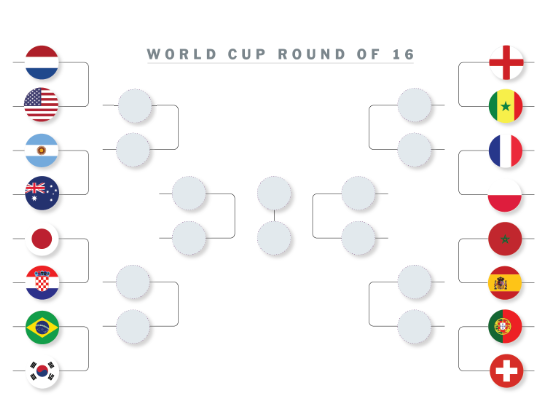

For the knockouts, I don’t need to predict the points, but the winner of each bracket. This function calculates the probability to win for each team. To do so, I calculated lambda for each team using the formula average_goals_scored * average_goals_conceded.<br>
The more goals that team scores it makes lambda bigger.<br>
The more goals that the other team conceded it makes lambda bigger.<br>
This a way to benefit those teams that score more goals and penalize those teams that comced more goals. <br>

Then I simulated all the possible scores of a match from 0–0 to 10–10 but without draws. In knockout there are no draws (kind of), and possibility of a tie didn't help the final calculation, so I removed it. <br>

Once I have lambda and x, I use the formula of the Poisson distribution to calculate p.

After each round, I update the winners using the predict_winner function and then update the next round with the new games.


In [ ]:
def predict_winner(team1, team2):
      # goals_scored * goals_conceded
      lamb_team1 = get_goals_scored(team1) * get_goals_conceded(team2)
      lamb_team2 = get_goals_scored(team2) * get_goals_conceded(team1)
      prob_team1, prob_team2 = 0, 0
      
      for g1 in range(0, 11): # number of goals for team 1
          for g2 in range(0, 11): # number of goals for team 2
              p = poisson.pmf(g1, lamb_team1) * poisson.pmf(g2, lamb_team2)
              if g1 > g2:
                  prob_team1 += p
              elif g2 > g1:
                  prob_team2 += p
      
      return team1 if prob_team1 >= prob_team2 else team2

In [ ]:
def predict_winners(df_fixture_updated):
    for index, row in df_fixture_updated.iterrows():
        team1, team2 = row['Team 1'], row['Team 2']
        winner = predict_winner(team1, team2)
        df_fixture_updated.loc[index, 'winner'] = winner
    return df_fixture_updated

In [ ]:
def update_next_round(df_fixture_round_1, df_fixture_round_2):
    for index, row in df_fixture_round_1.iterrows():
        winner = df_fixture_round_1.loc[index, 'winner']
        match = df_fixture_round_1.loc[index, 'Match']
        df_fixture_round_2.replace({f'Winners {match}':winner}, inplace=True)
    df_fixture_round_2['winner'] = '?'
    return df_fixture_round_2

##From now on, we gonna predict and update, predict and update... till we get the winner!!

In [ ]:
predict_winners(df_fixture_knockout)

,Team 1,Team 2,Match,Round,winner
48,Netherlands,United States,Match 49,Knockout 1,Netherlands
49,Argentina,Australia,Match 50,Knockout 2,Argentina
50,France,Poland,Match 52,Knockout 3,France
51,England,Senegal,Match 51,Knockout 4,England
52,Japan,Croatia,Match 53,Knockout 5,Croatia
53,Brazil,South Korea,Match 54,Knockout 6,Brazil
54,Morocco,Spain,Match 55,Knockout 7,Spain
55,Portugal,Switzerland,Match 56,Knockout 8,Portugal


**Quarter Final**

In [ ]:
update_next_round(df_fixture_knockout, df_fixture_quarter)

,Team 1,Team 2,Match,Round,winner
56,Croatia,Brazil,Match 58,Quarter Final 1,?
57,Netherlands,Argentina,Match 57,Quarter Final 2,?
58,Spain,Portugal,Match 60,Quarter Final 3,?
59,England,France,Match 59,Quarter Final 4,?


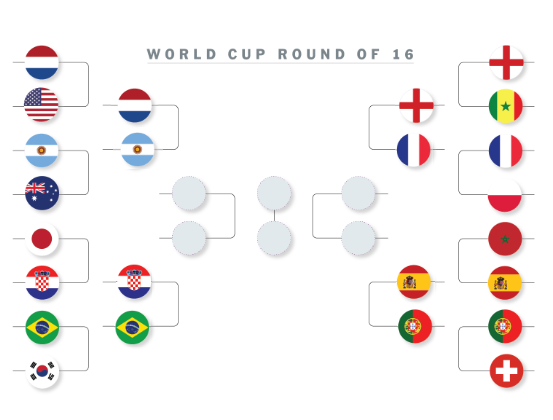

In [ ]:
predict_winners(df_fixture_quarter)

,Team 1,Team 2,Match,Round,winner
56,Croatia,Brazil,Match 58,Quarter Final 1,Brazil
57,Netherlands,Argentina,Match 57,Quarter Final 2,Netherlands
58,Spain,Portugal,Match 60,Quarter Final 3,Portugal
59,England,France,Match 59,Quarter Final 4,France


**Semifinal**

In [ ]:
update_next_round(df_fixture_quarter, df_fixture_semi)

,Team 1,Team 2,Match,Round,winner
60,Netherlands,Brazil,Match 61,Semi Final 1,?
61,France,Portugal,Match 62,Semi Final 2,?


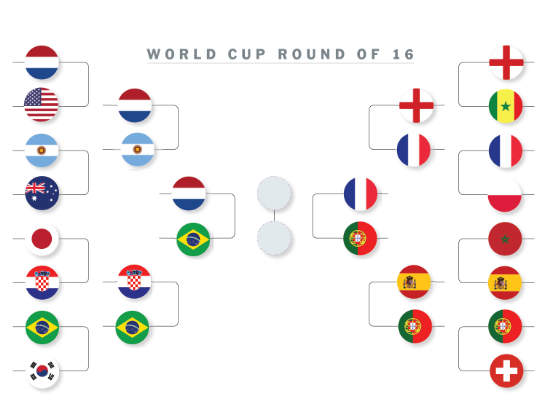

In [ ]:
predict_winners(df_fixture_semi)

,Team 1,Team 2,Match,Round,winner
60,Netherlands,Brazil,Match 61,Semi Final 1,Brazil
61,France,Portugal,Match 62,Semi Final 2,France


**The Big Final**

In [ ]:
update_next_round(df_fixture_semi, df_fixture_final)

,Team 1,Team 2,Match,Round,winner
63,Brazil,France,Match 64,Final,?


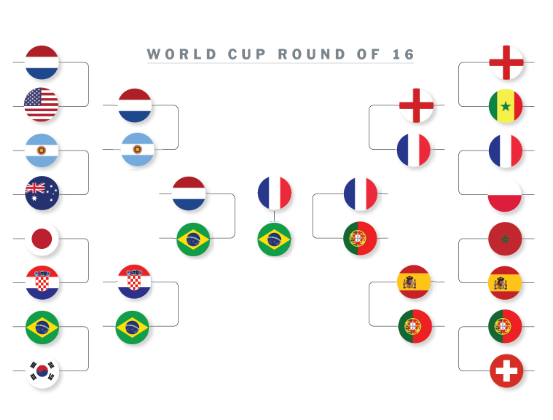

##**And the winners are ???**

In [ ]:
predict_winners(df_fixture_final)

,Team 1,Team 2,Match,Round,winner
63,Brazil,France,Match 64,Final,Brazil


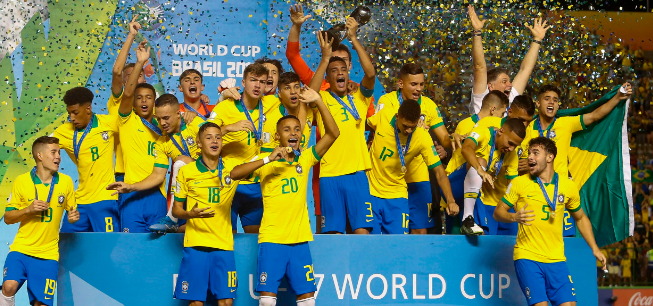